# 12. Learning Curves - Part 1
We would like to know if we can apply learning curves plots to our data to get more insight in the learning process. First, let's create a (relatively small) dataframe.

In [12]:
import pandas as pd
from preprocessing import PreProcessor

pp = PreProcessor()

df = pd.read_csv('Structured_DataFrame_Sample_500_Main_Categories.csv', index_col=0)
df['Item Description'] = df['Item Description'].apply(lambda d: pp.preprocess(str(d)))

df.shape

(4500, 3)

## Vectorize and create a test set

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(min_df=20, ngram_range=(1, 2))
features = tfidf.fit_transform(df['Item Description'])
labels = df.category_id

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

## The learning_curve()

In [14]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import learning_curve

train_sizes = [500, 750, 1000, 1500, 2000, 2500, 3000, 3600]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearSVC(),
X = features,
y = labels, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

## Learning results

In [15]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.004      -0.004      -0.004      -0.004      -0.        ]
 [-0.00533333 -0.00266667 -0.00266667 -0.00533333 -0.00533333]
 [-0.004      -0.003      -0.003      -0.005      -0.005     ]
 [-0.00333333 -0.00333333 -0.00333333 -0.004      -0.00333333]
 [-0.0775     -0.0935     -0.086      -0.122      -0.1295    ]
 [-0.2004     -0.1976     -0.1672     -0.2488     -0.2312    ]
 [-0.489      -0.49333333 -0.45466667 -0.50666667 -0.52833333]
 [-0.68638889 -0.76138889 -0.78694444 -0.80611111 -0.80805556]]

 ----------------------------------------------------------------------

Validation scores:

 [[-20.75333333 -20.52       -20.58444444 -19.71888889 -20.26333333]
 [-16.77888889 -16.35222222 -16.80111111 -16.27333333 -16.59222222]
 [-16.06666667 -15.56888889 -15.80666667 -15.62777778 -15.98555556]
 [-14.97666667 -14.46666667 -14.59555556 -14.20222222 -14.58444444]
 [-10.36        -9.93555556  -9.60777778 -10.76777778  -9.95222222]
 [ -6.59111111  -6.6         -6.61555556 

## Creating a single error score
To visualise the learning curve, we need a single error score per train set, instead of 5.

In [16]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 500     0.003200
750     0.004267
1000    0.004000
1500    0.003467
2000    0.101700
2500    0.209040
3000    0.494400
3600    0.769778
dtype: float64

 --------------------

Mean validation scores

 500     20.368000
750     16.559556
1000    15.811111
1500    14.565111
2000    10.124667
2500     6.900000
3000     4.241556
3600     2.770222
dtype: float64


## Plotting the learning curve

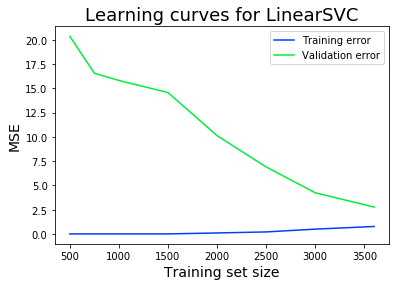

In [17]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-bright')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14) # Mean Squared Error
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for LinearSVC', fontsize = 18)
plt.legend()
plt.show()

## Trying a larger dataset
Now let's do the same for a larger dataset.

In [7]:
df = pd.read_csv('Structured_DataFrame_Sample_500.csv', index_col=0)
df['Item Description'] = df['Item Description'].apply(lambda d: pp.preprocess(str(d)))

df.shape

(15000, 3)

In [8]:
features = tfidf.fit_transform(df['Item Description'])
labels = df.category_id

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

In [9]:
train_sizes = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearSVC(),
X = features,
y = labels, train_sizes = train_sizes, cv = 5,
scoring = 'neg_mean_squared_error')

In [10]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

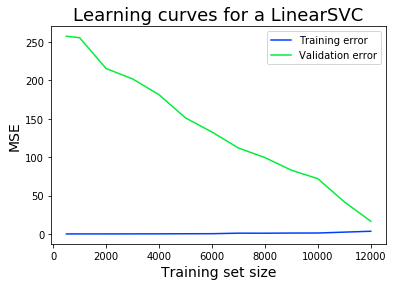

In [11]:
plt.style.use('seaborn-bright')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14) # Mean Squared Error
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a LinearSVC', fontsize = 18)
plt.legend()
plt.show()